In [53]:
import pandas as pd
import time
import datetime as dt
from datetime import datetime
from datetime import datetime, date, time, timedelta
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
import math
from scipy import stats
import statsmodels
from pylab import *

%matplotlib inline

In [39]:
# TSND151

# 特徴量の計算の際:dataとなる部分

data1_a = pd.read_csv('sensor_data/session1/TSND151/raw_data_time/心筋電/Conv-mem-A心筋-20201111-121748240-ead.csv', encoding="shift-jis")
data1_b = pd.read_csv('sensor_data/session1/TSND151/raw_data_time/心筋電/Conv-mem-B心筋-20201111-122303403-ead.csv', encoding="shift-jis")
data1_c = pd.read_csv('sensor_data/session1/TSND151/raw_data_time/心筋電/Conv-mem-C心筋-20201111-121748453-ead.csv', encoding="shift-jis")
data1_d = pd.read_csv('sensor_data/session1/TSND151/raw_data_time/心筋電/Conv-mem-D心筋-20201111-121748555-ead.csv', encoding="shift-jis")
data2_a = pd.read_csv('sensor_data/session2/TSND151/raw_data_time/心筋電/Conv-mem-A心筋-20201111-145808287-ead.csv', encoding="shift-jis")
data2_b = pd.read_csv('sensor_data/session2/TSND151/raw_data_time/心筋電/Conv-mem-B心筋-20201111-145741908-ead.csv', encoding="shift-jis")
data2_c = pd.read_csv('sensor_data/session2/TSND151/raw_data_time/心筋電/Conv-mem-C心筋-20201111-150032244-ead.csv', encoding="shift-jis")
data2_d = pd.read_csv('sensor_data/session2/TSND151/raw_data_time/心筋電/Conv-mem-D心筋-20201111-145749360-ead.csv', encoding="shift-jis")

# Anotation_data

data1_a_label = pd.read_csv('emotion_label/label/emotion_A_20201111_1.csv')
data1_b_label = pd.read_csv('emotion_label/label/emotion_B_20201111_1.csv')
data1_c_label = pd.read_csv('emotion_label/label/emotion_C_20201111_1.csv')
data1_d_label = pd.read_csv('emotion_label/label/emotion_D_20201111_1.csv')
data2_a_label = pd.read_csv('emotion_label/label/emotion_A_20201111_2.csv')
data2_b_label = pd.read_csv('emotion_label/label/emotion_B_20201111_2.csv')
data2_c_label = pd.read_csv('emotion_label/label/emotion_C_20201111_2.csv')
data2_d_label = pd.read_csv('emotion_label/label/emotion_D_20201111_2.csv')

In [40]:
# datetime型に変換

# sensor_dataは["時刻"]の列がhh:mm:ss.000の書式なのでyyyy-m-d を追加してから変換
# anotation_dataは["timeHMS"]の列がyyyy/m/d hh:mm:ssの書式なのでそのまま変換

data_list = [data1_a,data1_b,data1_c,data1_d,data2_a,data2_b,data2_c,data2_d]
anotation_data_list = [data1_a_label,data1_b_label,data1_c_label,data1_d_label,data2_a_label,data2_b_label,data2_c_label,data2_d_label]

for i in range(len(data_list)):
    data_list[i]["時刻"] = "2020-11-11 " + data_list[i]["時刻"]
    data_list[i]['時刻'] = pd.to_datetime(data_list[i]['時刻'])
for i in range(len(anotation_data_list)):
    anotation_data_list[i]['timeHMS'] = pd.to_datetime(anotation_data_list[i]['timeHMS'])

In [41]:
# anotation_dataの抜き出し(positive,neutral,negative)

# .reset_index(drop=True)でindexを振りなおしている(下記のfor文で使いやすくするため)
# 特徴量の計算の際:emotion_timesとなる部分

positive_times_1a = data1_a_label["timeHMS"][data1_a_label["emotion_level"]>0].reset_index(drop=True)
positive_times_1b = data1_b_label["timeHMS"][data1_b_label["emotion_level"]>0].reset_index(drop=True)
positive_times_1c = data1_c_label["timeHMS"][data1_c_label["emotion_level"]>0].reset_index(drop=True)
positive_times_1d = data1_d_label["timeHMS"][data1_d_label["emotion_level"]>0].reset_index(drop=True)
positive_times_2a = data2_a_label["timeHMS"][data2_a_label["emotion_level"]>0].reset_index(drop=True)
positive_times_2b = data2_b_label["timeHMS"][data2_b_label["emotion_level"]>0].reset_index(drop=True)
positive_times_2c = data2_c_label["timeHMS"][data2_c_label["emotion_level"]>0].reset_index(drop=True)
positive_times_2d = data2_d_label["timeHMS"][data2_d_label["emotion_level"]>0].reset_index(drop=True)

neutral_times_1a = data1_a_label["timeHMS"][data1_a_label["emotion_level"]==0].reset_index(drop=True)
neutral_times_1b = data1_b_label["timeHMS"][data1_b_label["emotion_level"]==0].reset_index(drop=True)
neutral_times_1c = data1_c_label["timeHMS"][data1_c_label["emotion_level"]==0].reset_index(drop=True)
neutral_times_1d = data1_d_label["timeHMS"][data1_d_label["emotion_level"]==0].reset_index(drop=True)
neutral_times_2a = data2_a_label["timeHMS"][data2_a_label["emotion_level"]==0].reset_index(drop=True)
neutral_times_2b = data2_b_label["timeHMS"][data2_b_label["emotion_level"]==0].reset_index(drop=True)
neutral_times_2c = data2_c_label["timeHMS"][data2_c_label["emotion_level"]==0].reset_index(drop=True)
neutral_times_2d = data2_d_label["timeHMS"][data2_d_label["emotion_level"]==0].reset_index(drop=True)

negative_times_1a = data1_a_label["timeHMS"][data1_a_label["emotion_level"]<0].reset_index(drop=True)
negative_times_1b = data1_b_label["timeHMS"][data1_b_label["emotion_level"]<0].reset_index(drop=True)
negative_times_1c = data1_c_label["timeHMS"][data1_c_label["emotion_level"]<0].reset_index(drop=True)
negative_times_1d = data1_d_label["timeHMS"][data1_d_label["emotion_level"]<0].reset_index(drop=True)
negative_times_2a = data2_a_label["timeHMS"][data2_a_label["emotion_level"]<0].reset_index(drop=True)
negative_times_2b = data2_b_label["timeHMS"][data2_b_label["emotion_level"]<0].reset_index(drop=True)
negative_times_2c = data2_c_label["timeHMS"][data2_c_label["emotion_level"]<0].reset_index(drop=True)
negative_times_2d = data2_d_label["timeHMS"][data2_d_label["emotion_level"]<0].reset_index(drop=True)

In [42]:
def EMG(data):
    sum_x = np.sum(data['整流化'])
    return sum_x

In [43]:
def VLF(data):
    x = data['整流化'].values.flatten()
    fs = 1000
    n = len(data)
    fft = fftpack.fftfreq(n,1/fs)
    spectrum = np.abs(fftpack.fft(x))
    
    a = pd.DataFrame(fft)
    a.rename(columns={0: 'freq'},inplace = True)
    b = pd.DataFrame(spectrum)
    b.rename(columns={0: 'inten'},inplace = True)
    result = pd.concat([a,b],axis = 1)
    #result.to_csv("result.csv",encoding = "SHIFT_JIS")
    result = result.set_index('freq')
    VLF = result.loc[10:169]
    sumVLF = 0
    for data in VLF.inten:
        sumVLF += data
    return sumVLF

In [44]:
def LF(data):
    x = data['整流化'].values.flatten()
    fs = 1000
    n = len(data)
    fft = fftpack.fftfreq(n,1/fs)
    spectrum = np.abs(fftpack.fft(x))
    
    a = pd.DataFrame(fft)
    a.rename(columns={0: 'freq'},inplace = True)
    b = pd.DataFrame(spectrum)
    b.rename(columns={0: 'inten'},inplace = True)
    result = pd.concat([a,b],axis = 1)
    #result.to_csv("result.csv",encoding = "SHIFT_JIS")
    result = result.set_index('freq')
    LF = result.loc[170:200]
    sumLF = 0
    for data in LF.inten:
        sumLF += data
    return sumLF

In [45]:
def HF1(data):
    x = data['整流化'].values.flatten()
    fs = 1000
    n = len(data)
    fft = fftpack.fftfreq(n,1/fs)
    spectrum = np.abs(fftpack.fft(x))
    
    a = pd.DataFrame(fft)
    a.rename(columns={0: 'freq'},inplace = True)
    b = pd.DataFrame(spectrum)
    b.rename(columns={0: 'inten'},inplace = True)
    result = pd.concat([a,b],axis = 1)
    #result.to_csv("result.csv",encoding = "SHIFT_JIS")
    result = result.set_index('freq')
    HF1 = result.loc[211:300]
    sumHF1 = 0
    for data in HF1.inten:
        sumHF1 += data
    return sumHF1

In [46]:
def HF2(data):
    x = data['整流化'].values.flatten()
    fs = 1000
    n = len(data)
    fft = fftpack.fftfreq(n,1/fs)
    spectrum = np.abs(fftpack.fft(x))
    
    a = pd.DataFrame(fft)
    a.rename(columns={0: 'freq'},inplace = True)
    b = pd.DataFrame(spectrum)
    b.rename(columns={0: 'inten'},inplace = True)
    result = pd.concat([a,b],axis = 1)
    #result.to_csv("result.csv",encoding = "SHIFT_JIS")
    result = result.set_index('freq')
    HF2 = result.loc[211:350]
    sumHF2 = 0
    for data in HF2.inten:
        sumHF2 += data
    return sumHF2

In [47]:
def HF3(data):
    x = data['整流化'].values.flatten()
    fs = 1000
    n = len(data)
    fft = fftpack.fftfreq(n,1/fs)
    spectrum = np.abs(fftpack.fft(x))
    
    a = pd.DataFrame(fft)
    a.rename(columns={0: 'freq'},inplace = True)
    b = pd.DataFrame(spectrum)
    b.rename(columns={0: 'inten'},inplace = True)
    result = pd.concat([a,b],axis = 1)
    #result.to_csv("result.csv",encoding = "SHIFT_JIS")
    result = result.set_index('freq')
    HF3 = result.loc[211:400]
    sumHF3 = 0
    for data in HF3.inten:
        sumHF3 += data
    return sumHF3

In [48]:
def HF4(data):
    x = data['整流化'].values.flatten()
    fs = 1000
    n = len(data)
    fft = fftpack.fftfreq(n,1/fs)
    spectrum = np.abs(fftpack.fft(x))
    
    a = pd.DataFrame(fft)
    a.rename(columns={0: 'freq'},inplace = True)
    b = pd.DataFrame(spectrum)
    b.rename(columns={0: 'inten'},inplace = True)
    result = pd.concat([a,b],axis = 1)
    #result.to_csv("result.csv",encoding = "SHIFT_JIS")
    result = result.set_index('freq')
    HF4 = result.loc[211:450]
    sumHF4 = 0
    for data in HF4.inten:
        sumHF4 += data
    return sumHF4

In [49]:
def HF5(data):
    x = data['整流化'].values.flatten()
    fs = 1000
    n = len(data)
    fft = fftpack.fftfreq(n,1/fs)
    spectrum = np.abs(fftpack.fft(x))
    
    a = pd.DataFrame(fft)
    a.rename(columns={0: 'freq'},inplace = True)
    b = pd.DataFrame(spectrum)
    b.rename(columns={0: 'inten'},inplace = True)
    result = pd.concat([a,b],axis = 1)
    #result.to_csv("result.csv",encoding = "SHIFT_JIS")
    result = result.set_index('freq')
    HF5 = result.loc[211:499]
    sumHF5 = 0
    for data in HF5.inten:
        sumHF5 += data
    return sumHF5

In [55]:
# 特徴量算出(時間指定～計算)

# data:sensor_dataのこと(ex,data_1a)
# emotion_times:positive,neutral,negatiiveのいずれかだけを抽出した時間データのこと(ex,positive_times_1a)  
# calculation_data:特徴量の計算方法の関数名のこと(ex,mean_acc_x_axis)

def Feature_Extraction(data,emotion_times,calculation_method):
    st = 4 # アノテーションのラベルからスタートまでの経過時間:start time
    et = 5 # 経過時間(s):elapsed time
    features_list = []
    for i in range(len(emotion_times)):
        dataX = data[(data["時刻"]>=(emotion_times[i]+dt.timedelta(seconds = st)))&(data["時刻"]<(emotion_times[i]+dt.timedelta(seconds = st + et)))]
        features = calculation_method(dataX)
        features_list.append(features)
    return(features_list)

In [51]:
# 特徴量計算(リストの合体)

def result_features(calculation_method):
    positive_1a = Feature_Extraction(data1_a,positive_times_1a,calculation_method)
    positive_1b = Feature_Extraction(data1_b,positive_times_1b,calculation_method)
    positive_1c = Feature_Extraction(data1_c,positive_times_1c,calculation_method)
    positive_1d = Feature_Extraction(data1_d,positive_times_1d,calculation_method)
    positive_2a = Feature_Extraction(data2_a,positive_times_2a,calculation_method)
    positive_2b = Feature_Extraction(data2_b,positive_times_2b,calculation_method)
    positive_2c = Feature_Extraction(data2_c,positive_times_2c,calculation_method)
    positive_2d = Feature_Extraction(data2_d,positive_times_2d,calculation_method)
    
    neutral_1a = Feature_Extraction(data1_a,neutral_times_1a,calculation_method)
    neutral_1b = Feature_Extraction(data1_b,neutral_times_1b,calculation_method)
    neutral_1c = Feature_Extraction(data1_c,neutral_times_1c,calculation_method)
    neutral_1d = Feature_Extraction(data1_d,neutral_times_1d,calculation_method)
    neutral_2a = Feature_Extraction(data2_a,neutral_times_2a,calculation_method)
    neutral_2b = Feature_Extraction(data2_b,neutral_times_2b,calculation_method)
    neutral_2c = Feature_Extraction(data2_c,neutral_times_2c,calculation_method)
    neutral_2d = Feature_Extraction(data2_d,neutral_times_2d,calculation_method)
    
    negative_1a = Feature_Extraction(data1_a,negative_times_1a,calculation_method)
    negative_1b = Feature_Extraction(data1_b,negative_times_1b,calculation_method)
    negative_1c = Feature_Extraction(data1_c,negative_times_1c,calculation_method)
    negative_1d = Feature_Extraction(data1_d,negative_times_1d,calculation_method)
    negative_2a = Feature_Extraction(data2_a,negative_times_2a,calculation_method)
    negative_2b = Feature_Extraction(data2_b,negative_times_2b,calculation_method)
    negative_2c = Feature_Extraction(data2_c,negative_times_2c,calculation_method)
    negative_2d = Feature_Extraction(data2_d,negative_times_2d,calculation_method)
    
    positive_list = positive_1a + positive_1b + positive_1c + positive_1d + positive_2a + positive_2b + positive_2c + positive_2d 
    neutral_list = neutral_1a + neutral_1b + neutral_1c + neutral_1d + neutral_2a + neutral_2b + neutral_2c + neutral_2d 
    negative_list = negative_1a + negative_1b + negative_1c + negative_1d + negative_2a + negative_2b + negative_2c + negative_2d 
    
    return positive_list,neutral_list,negative_list

In [56]:
from dtw import dtw

positive_list,neutral_list,negative_list = result_features(EMG)
# positive_list,neutral_list,negative_list = result_features(VLF)
#positive_list,neutral_list,negative_list = result_features(LF)
#positive_list,neutral_list,negative_list = result_features(HF1)
#positive_list,neutral_list,negative_list = result_features(HF2)
#positive_list,neutral_list,negative_list = result_features(HF3)
#positive_list,neutral_list,negative_list = result_features(HF4)
#positive_list,neutral_list,negative_list = result_features(HF5)
#print(negative_list)

KeyError: '整流化'

<function matplotlib.pyplot.show(*args, **kw)>

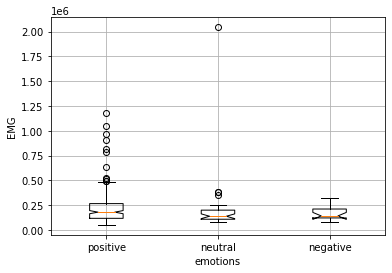

In [15]:
# 箱ひげ図plot

points = (positive_list,neutral_list,negative_list)

flg,ax = plt.subplots()

# bp = ax.boxplot(points)
bp = ax.boxplot(points,notch = True)

ax.set_xticklabels(['positive','neutral','negative'])

# plt.title('exp20201111_acc_x_axis')
plt.xlabel('emotions')
plt.ylabel('EMG')
# plt.ylabel('gyro')
plt.grid()
#plt.ylim(0,1500000)
plt.show

# plt.savefig('exp02_03_emotions(min_gyro_3_axis).png') # plotを保存

In [64]:
print(stats.kruskal(positive_list,neutral_list,negative_list))

KruskalResult(statistic=2.8357810022517924, pvalue=0.24222445053384178)


In [65]:
# 多重比較検定

def tukey_hsd( ind, *args ):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    import numpy as np
    data_arr = np.hstack( args )
    ind_arr = np.array([])
    for x in range(len(args)):
      ind_arr = np.append(ind_arr, np.repeat(ind[x], len(args[x])))
    res = pairwise_tukeyhsd(data_arr,ind_arr)
#     print(vars(res))
#     print(res.pvalues) #個別のp値が欲しいときはこっちを実行
    print(res)

tukey_hsd(['positive','neutral','negative'],positive_list,neutral_list,negative_list)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1   group2   meandiff  p-adj     lower       upper    reject
------------------------------------------------------------------
negative  neutral 44700.5098 0.6979 -90335.2033 179736.2228  False
negative positive 48100.3403 0.5872 -68324.6778 164525.3585  False
 neutral positive  3399.8306    0.9 -77479.4641  84279.1253  False
------------------------------------------------------------------
